<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/JingQian_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [105]:
# Function to calculate mean, variance, stdev from list
def calcualte_summary_statistics(list):
  sum = 0
  n = len(list)
  for item in list:
    sum = sum + item
    
  mean = sum/n
  deviation_square = [(item-mean)**2 for item in list]
  
  sum_D2=0
  for item in deviation_square:
     sum_D2 += item
  
  variance = sum_D2/(n-1)
  stdev = variance**0.5

  return mean, variance, stdev


sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
calcualte_summary_statistics(sales)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

In [0]:
# now use library function to double check

In [107]:
sales =np.array(sales)
print(np.mean(sales), np.var(sales,ddof=1), np.std(sales, ddof=1))

3052.714285714286 214387.90476190473 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [108]:
customers = [127, 80, 105, 92, 120, 115, 93]
cov = np.cov([sales, customers], ddof=1)
print(cov)
print('\n')

data = {'sales':sales, 'customers':customers}
df = pd.DataFrame(data)
print(df.cov()) 
# ??? It looks like the pandas function already decrease the dof by 1, do 
# all pandas statistic analysis assume to deal with sample instead of population???

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


                   sales    customers
sales      214387.904762  7604.357143
customers    7604.357143   290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [109]:
print(df.cov())
print('\n')
print(df.std())
print('\n')

std1 = df.std().sales
std2 = df.std().customers
std_denominator = [[std1**2, std1*std2], [std1*std2, std2**2]]

print('Now display hand calculated correlation coefficients')
print(np.divide(df.cov(), std_denominator))
print('\n')

print('Now display library function calculated correlation coefficient')
print(np.corrcoef([sales,customers]))

                   sales    customers
sales      214387.904762  7604.357143
customers    7604.357143   290.952381


sales        463.020415
customers     17.057326
dtype: float64


Now display hand calculated correlation coefficients
              sales  customers
sales      1.000000   0.962834
customers  0.962834   1.000000


Now display library function calculated correlation coefficient
[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df = df.iloc[:,1:]
df.isnull().sum()
print(df[df['pclass'].isnull()==1])
df = df.drop([1309], axis=0)
df.head()

      pclass  survived name  sex  ...  boat  body  home.dest has_cabin_number
1309     NaN       NaN  NaN  NaN  ...   NaN   NaN        NaN                0

[1 rows x 15 columns]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [111]:
df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [112]:
# Creat a subset of dataframe only have numerical variables
var_list = df.columns.values
num_var_list = []
print(var_list)
for item in var_list:
   if df[item].dtype=='float64':
     num_var_list.append(item)
print(num_var_list)

df_subset = df[num_var_list]
df_subset.head()

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest' 'has_cabin_number']
['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']


,pclass,survived,age,sibsp,parch,fare,body
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN


In [113]:
# Calculate the variance-covariance matrix for the titanic dataset's numeric columns
df_subset.cov()

,pclass,survived,age,sibsp,parch,fare,body
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000
age,-3.954605,-0.314343,165.976818,-2.559806,-1.459378,114.416613,81.622922
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567


In [114]:
# correlation matrix for the titanic dataset's numeric columns
df_subset.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000


In [0]:
# interpretation: 
# To increase the chance of survive, these variables favor a lower value: pclass, age, sibsp. 
# these variables favor a higher value: parch, fare
# So the young tuorists who spent a fortune on first class had the biggest chance to secure their places in the lifeboats of Titanic.

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

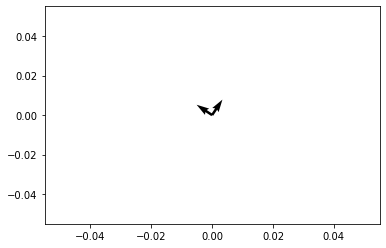

In [116]:
a = [2, -3]
b = [3, 2]
np.dot(a,b)

import matplotlib.pyplot as plt
origin = [0,0]
plt.quiver(*origin, a,b)
# vector a, b are perpendicular to each other. 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [117]:
a = [-5, 3, 7]
b=[6,-8,2]
np.dot(a, b)==0
# Not orthogonal, inner dot product is not zero

False

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [118]:
c = np.array([2, -15, 6, 20])

print('||c||^2 = ',np.linalg.norm(c))
print('c.c = ', np.dot(c,c))
print('cT = ', c.transpose())## why didn't transpose c????
cT = c.reshape(-1,1)
print(cT)
print('cTc =',cT*c )

c=c.reshape(1,-1) # unless we reshape c (add one dim), matmul would say inner dimension don't match of the two factor matrice!
np.matmul(cT,c)

||c||^2 =  25.787593916455254
c.c =  665
cT =  [  2 -15   6  20]
[[  2]
 [-15]
 [  6]
 [ 20]]
cTc = [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} =  7*\begin{bmatrix} 1\\0 \end{bmatrix}+12*\begin{bmatrix} 0\\ 1 \end{bmatrix}
\end{align}  \\

\begin{align}
e=\begin{bmatrix} 2\\11\\-8 \end{bmatrix} =  2*\begin{bmatrix} 1\\0\\0 \end{bmatrix}+11*\begin{bmatrix} 0\\ 1\\0 \end{bmatrix}-8*\begin{bmatrix} 0\\ 0\\1 \end{bmatrix}
\end{align} \\

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [129]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.multiply(f,f).sum()**0.5
print('norm of f is ', f_norm)
f = f/f_norm
print(f)
np.linalg.norm(f)

norm of f is  19.131126469708992
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

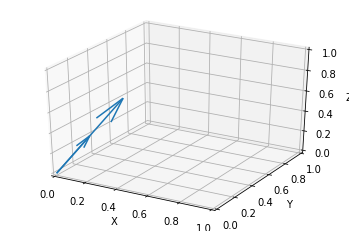

In [148]:
from mpl_toolkits.mplot3d import Axes3D
vectors = np.array([[0, 0, 0, .1, .2, .3],
                    [0, 0, 0, .2, .4, .6]])
o1, o2, o3, u, v, w = zip(*vectors)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(o1, o2, o3, u, v, w, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

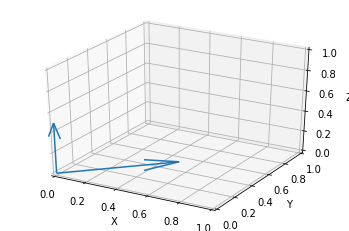

In [153]:
from mpl_toolkits.mplot3d import Axes3D
vectors = np.array([[0, 0, 0, .5, .5, 0],
                    [0, 0, 0, 0, 0, .5]])
o1, o2, o3, u, v, w = zip(*vectors)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(o1, o2, o3, u, v, w, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# h=4*g, so they are depe  ndent vectors, their span is a line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [165]:
# They are independent vectors, their span is a 3d vector space
l = np.array([1, 2, 3])
m= np.array([-1, 0, 7])
n = np.array([4, 8, 2])
matrix = np.array([l,m,n])
matrix = matrix.transpose()
print(np.linalg.det(matrix))
print('They are independent vectors because the determinant of their vector-formed matrix is nonzero')


-20.000000000000007
They are independent vectors because the determinant of their vector-formed matrix is nonzero


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



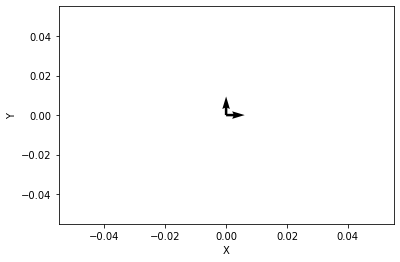

In [183]:
vectors = np.array([[1, 0],
                    [0, 1]])
o = [0,0]
u, v = zip(*vectors)
fig = plt.figure()
ax = fig.gca(projection=None)
ax.quiver(*o, u, v)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()
# ??? why they are so small

## 6.2 What does it mean to form a basis?

The basis of a vector space V is a set of vectors that are linearly independent and that span the vector space V.

A set of vectors spans a space if their linear combinations fill the space.


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [186]:
# hand calculated rank is 3, now use function to double check
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
print(np.linalg.matrix_rank(P))

3


## 7.2 What does the rank of a matrix tell us?

A rank of N matrix means its columns can span N-dimensional vector space.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


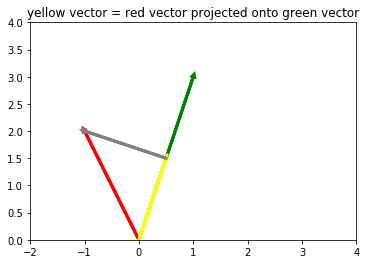

In [196]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-0,4)

# Original Vector
v = np.array([1,3])
w = np.array([-1,2])

proj = np.multiply(np.dot(w,v)/np.dot(v,v), v)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
# plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'grey')
plt.title("yellow vector = red vector projected onto green vector" )
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()